# Purpose

Summarise forecasting results in business terms and demonstrate how return and volatility forecasts inform practical risk and decision-making.

# Imports

In [11]:
import pandas as pd
import numpy as np
from IPython.display import Image, display

In [12]:
# Configuration for clean output
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.6f}'.format)

# Returns

## Accuracy comparison

In [20]:
return_results = pd.read_csv("../outputs/tables/return_model_comparison.csv")
return_results

,Model,MAE,RMSE
0,Baseline Mean,0.008104,0.011026
1,ARIMA,0.008264,0.011158


No material improvement over baseline at a daily horizon, consistent with return noise dominating signal.

## Visual comparison

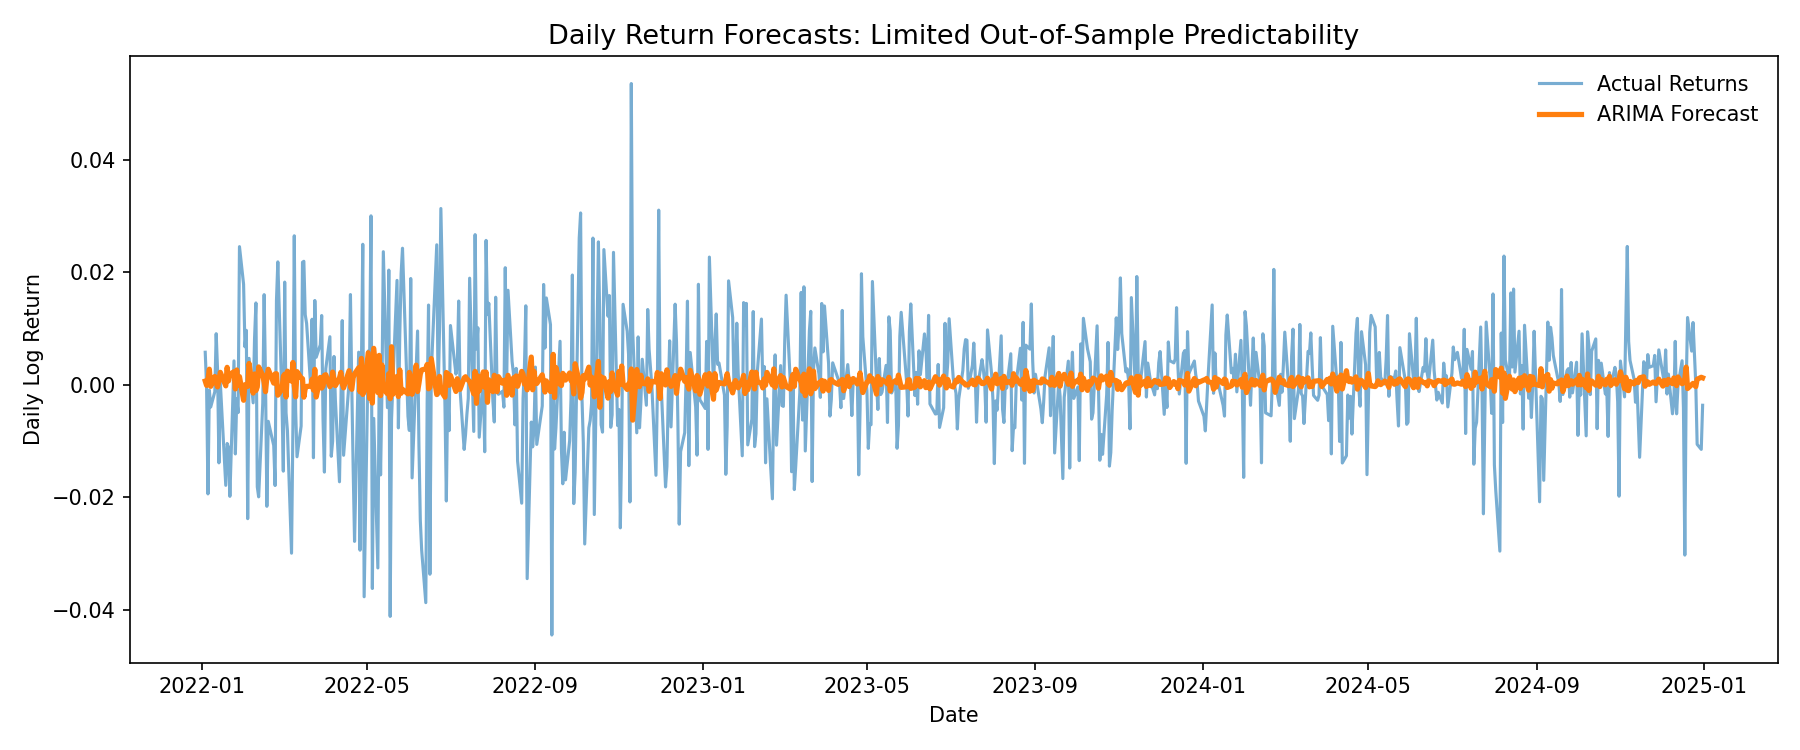

In [15]:
display(Image(filename='../outputs/figures/return_forecast_comparison.png'))

Forecasts collapse toward zero, highlighting the dominance of noise over signal.

Out-of-sample predictability of daily returns is negligible.

## Interpretation

The ARIMA model provides no material improvement over the Baseline Mean. The MAE/RMSE metrics are virtually identical.

This confirms that daily price history contains negligible predictive power for future direction.

Forecasts should not be relied upon for directional trading (i.e., Long or Short). Transaction costs would almost certainly erode any theoretical edge seen in the 4th decimal place.

# Volatility

## Accuracy comparison

In [19]:
vol_results = pd.read_csv("../outputs/tables/volatility_model_comparison.csv")
vol_results

,Model,MAE,RMSE,MAE_Ann (%),RMSE_Ann (%)
0,Naive,0.000351,0.000592,0.557797,0.939802
1,ETS,0.000351,0.000592,0.557613,0.939792
2,GARCH (Daily),0.001444,0.001963,2.291819,3.116276
3,GARCH (21d Smoothed),0.000974,0.001222,1.546946,1.940086


Naive and ETS models yield nearly identical errors because, at a one-day horizon, both effectively follows a random walk: $\hat{\sigma}_{t} = \sigma_{t-1}$, benefiting from the extreme autocorrelation in the 21-day realised volatility series.

Raw GARCH forecasts exhibit the highest error metrics because they estimate daily spot risk, whereas the target is a smoothed 21-day average. This frequency mismatch statistically penalises GARCH for its inherent reactivity.

Smoothing GARCH forecasts to a 21-day window reduces the annualised MAE from 2.29% to 1.55%, confirming that GARCH captures the structural level of risk effectively once the noise of different measurement horizons is mitigated.

## Visual comparison

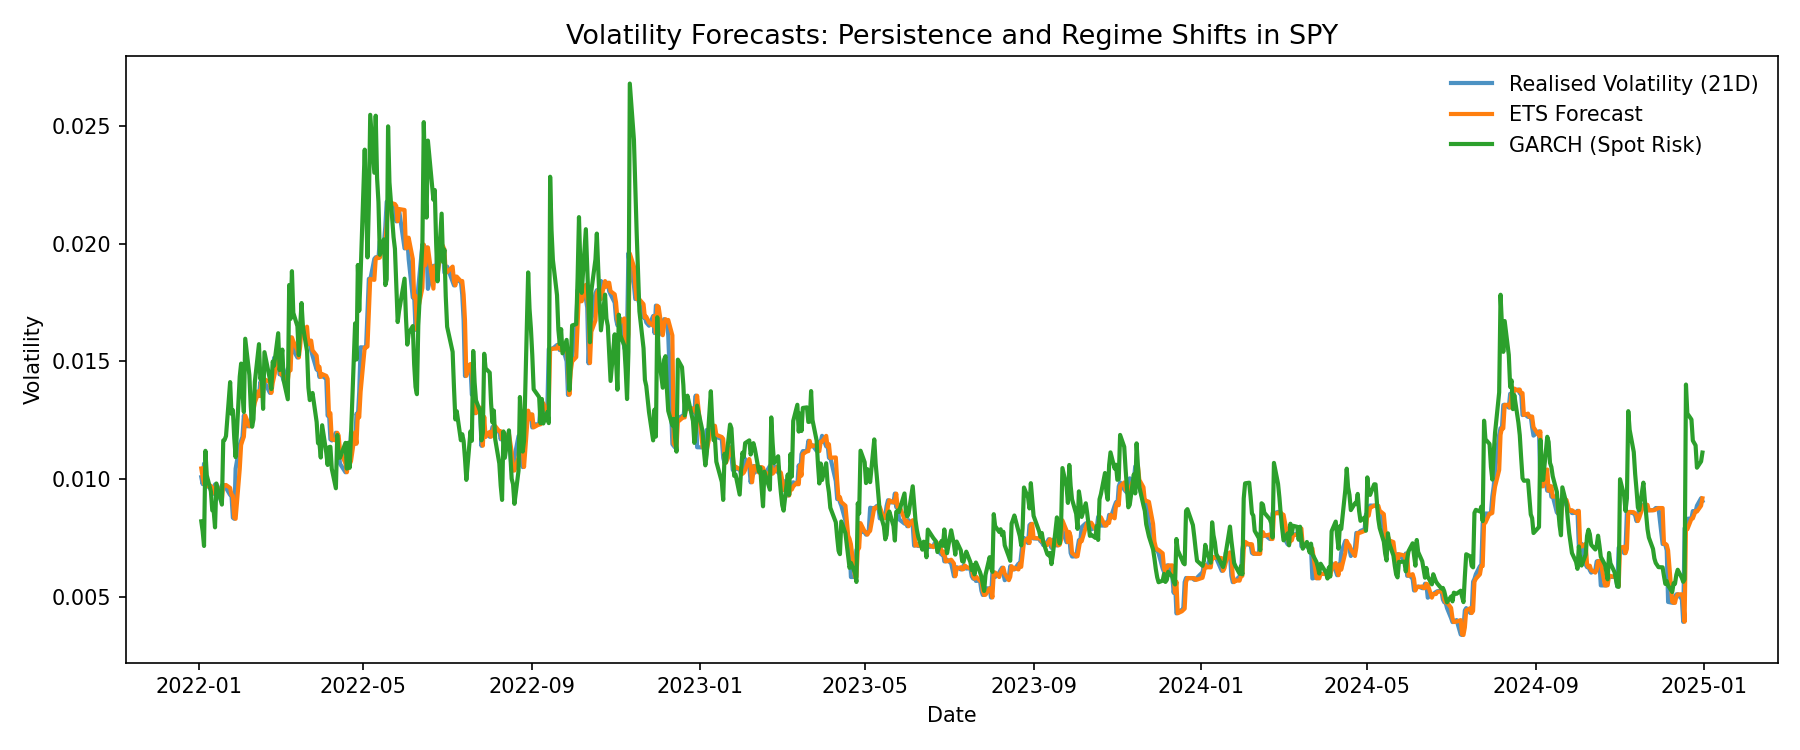

In [18]:
display(Image(filename='../outputs/figures/volatility_forecast_comparison.png'))

Volatility is persistent, not random.

Both ETS and GARCH capture the level of volatility far better than any return model captures direction.

However,

ETS behaves like a smoother:

+ Excellent at tracking medium-term regimes

+ Low noise, high stability

+ Lags during sudden jumps, but doesn’t overreact

GARCH behaves like a shock detector:

+ Responds immediately to large return shocks.

+ Captures clustering and conditional heteroskedasticity.

+ Noisier and less accurate in RMSE terms because it forecasts risk, not smooth averages.

## Interpretation

Volatility is forecastable in structure, even if not precisely timed.

These forecasts are suitable for risk limits, position sizing, stress testing, and capital allocation.

GARCH captures conditional variance dynamics not visible in smoothing models, which is valuable for modelling conditional variance dynamics relevant to risk management.

Volatility is highly forecastable in magnitude (level), even if the specific timing of shocks is stochastic.

### The "Accuracy" Winner

The Naive and ETS models perform best on RMSE because they track the high persistence of the target variable (21-day Realised Volatility).

They are better at Reporting & Accounting. If we need to predict "What will the risk report say tomorrow?", use ETS.

### The "Utility" Winner

GARCH has higher RMSE because it reacts to structural shocks rather than just averaging the past.

It is the best for Risk Management & Trading. If we want to answer "Is the market crashing now?", use GARCH.

# Conclusion

Daily return forecasting is futile with simple time-series models. The signal-to-noise ratio is too low.

Volatility forecasting is highly effective. We can reliably predict the risk regime (High/Low volatility) even if we cannot predict the next day's price.

Model Selection: 

+ Use ETS for smooth, stable estimates of "average" volatility (e.g., setting longer-term capital buffers).

+ Use GARCH for reactive, tactical estimates of "spot" volatility (e.g., daily VaR limits or adjusting leverage).

# Limitations

Analysis considers only SPY history. It ignores macro factors (VIX, Interest Rates) that drives volatility.

The GARCH model assumes parameters ($\alpha, \beta$) are constant over 2022–2024. In reality, market structure shifts (regime changes) often require re-estimating parameters.

Analysis is limited to one-step-ahead (Daily). Long-term forecasts (Monthly/Quarterly) might favor different models.